In [54]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [55]:

#read in the url and scrape ticker data
data_table = pd.read_csv('Data/stock_companies.csv')
data_table

,Symbol,Security
0,MMM,3M
1,ABT,Abbott Laboratories
2,ABBV,AbbVie
3,ABMD,Abiomed
4,ACN,Accenture
...,...,...
500,YUM,Yum! Brands
501,ZBRA,Zebra Technologies
502,ZBH,Zimmer Biomet
503,ZION,Zions Bancorp


In [56]:
############################# run this once And save the results to a csv. Taked approx. 22 mins 
#################### Comment after it has executed once. 
# # tickers = company_list
# tickers = data_table['Symbol'].str.strip()

# closing_prices_list = []
# for ticker in tickers:
#     try:
#         prices = pdr.DataReader(ticker,'yahoo','10/21/2020')
#         # print(prices)
#         prices = prices['Close']
#         prices = pd.DataFrame(prices)
#         # print(prices)
#         prices.columns = [ticker]
#         closing_prices_list.append(prices)
#         # print(closing_prices_list)
#     except:
#         pass
#     # print(closing_prices_list)
#     prices_df = pd.concat(closing_prices_list,axis=1)

# prices_df.sort_index(inplace=True)
# prices_df
# prices_df.to_csv("Data/prices_df.csv", index=True)

In [57]:
# the data gathered in the above dataframe and saved to csv file is being retrieved here
fromcsv = pd.read_csv('Data/prices_df.csv')
fromcsv=fromcsv.set_index('Date')
fromcsv

prices_df = fromcsv
prices_df.shape

(254, 499)

In [58]:
prices_df.columns

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=499)

In [59]:
# prices_df.pct_change()

In [60]:
# prices_df.pct_change() # gets the precentage change across column leaving the first row NAN
# (prices_df.pct_change().sum()/len(prices_df)-1)*len(prices_df)
# this can be replaced by the following

In [61]:
per_change = prices_df.pct_change().mean()*252
per_change = per_change.to_frame()
per_change

,0
MMM,0.089124
ABT,0.195625
ABBV,0.293811
ABMD,0.303877
ACN,0.430877
...,...
YUM,0.263619
ZBRA,0.645047
ZBH,0.093090
ZION,0.870533


In [62]:
# change for time intervel
# ((41.248280-27.372362)/27.372362)*100

In [63]:
# prices_df.pct_change()

In [64]:
per_change = per_change.rename(columns={0:'Returns'})
per_change

,Returns
MMM,0.089124
ABT,0.195625
ABBV,0.293811
ABMD,0.303877
ACN,0.430877
...,...
YUM,0.263619
ZBRA,0.645047
ZBH,0.093090
ZION,0.870533


In [65]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
# returns = prices_df.pct_change().mean() * 252
# returns = pd.DataFrame(returns)
# returns.columns = ['Returns']
per_change['Volatility'] = prices_df.pct_change().std() * sqrt(252)
per_change

,Returns,Volatility
MMM,0.089124,0.193555
ABT,0.195625,0.215668
ABBV,0.293811,0.225390
ABMD,0.303877,0.334941
ACN,0.430877,0.199140
...,...,...
YUM,0.263619,0.189698
ZBRA,0.645047,0.288551
ZBH,0.093090,0.263143
ZION,0.870533,0.459569


# Clusters with Unscaled Data

In [66]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(per_change)
    distortions.append(sum(np.min(cdist(per_change, km.cluster_centers_,
                                        'euclidean'), axis=1)) / per_change.shape[0])
    inertia.append(km.inertia_)

C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


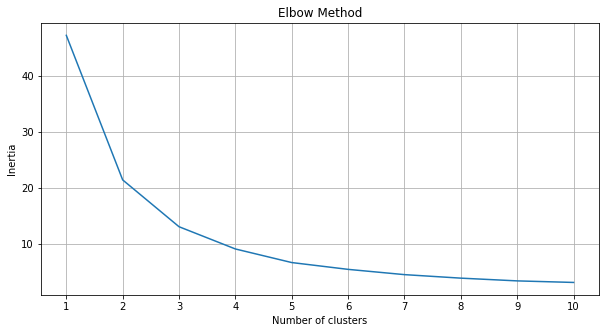

In [67]:
# Create the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 5))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
# plt.plot(df_elbow['k'], distortions, 'bx-')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

#### Looks like there or 4 or 5 clusters. Let's try scaling the data first

# Clusters with Scaled Data

In [68]:
stock_data_scaled = StandardScaler().fit_transform(per_change)
stock_data_scaled_df = pd.DataFrame(stock_data_scaled)
stock_data_scaled_df.shape
# stock_data_scaled

(499, 2)

In [69]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(stock_data_scaled)
    distortions.append(sum(np.min(cdist(stock_data_scaled, km.cluster_centers_,
                                        'euclidean'), axis=1)) / stock_data_scaled.shape[0])
    inertia.append(km.inertia_)

C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


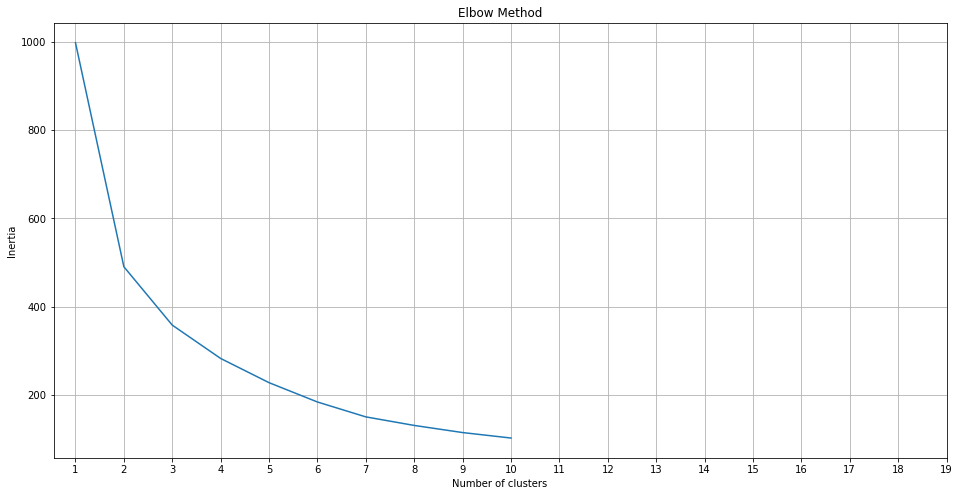

In [70]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(16, 8))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,20))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

In [71]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(stock_data_scaled)

# Predict clusters
predictions = model.predict(stock_data_scaled)

In [72]:
# Add the predicted cluster column to the dataframe (name it class)
per_change["Cluster"] = model.labels_
per_change["Cluster"].unique()
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


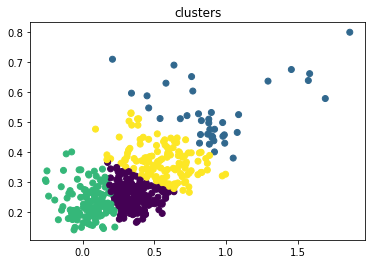

In [73]:
plt.scatter(x=per_change['Returns'], y=per_change['Volatility'], c=per_change['Cluster'])
# fig = plt.figure(figsize=(15, 5))
plt.title('Clusters')
plt.show()

In [74]:
per_change = per_change.sort_values(by='Cluster')
per_change = per_change.reset_index()
per_change = per_change.rename(columns={'index':'Stock'})
per_change

,Stock,Returns,Volatility,Cluster
0,IFF,0.321702,0.303330,0
1,ICE,0.287120,0.179891,0
2,IP,0.228838,0.257619,0
3,INTU,0.597667,0.266623,0
4,ISRG,0.374165,0.275534,0
...,...,...,...,...
494,NFLX,0.349696,0.334905,3
495,TECH,0.713585,0.346433,3
496,NWSA,0.582892,0.295422,3
497,MCHP,0.374351,0.369937,3


In [75]:
file_path = "Data/Analyzed/Clustered_Stocks.csv"
per_change.to_csv(file_path)

# PCA ??
As there were only 2 features , we do not require any dimenssionality reduction

#### uncomment the following cells if you want to check with PCA (Principal component analysis)

In [76]:
# # Initialize PCA model
# pca = PCA(n_components=0.90)
# stock_data_scaled_df
# stock_data_scaled_df
# # stock_data_scaled
# stock_data_scaled.shape
# stock_data_for_pca = pca.fit_transform(stock_data_scaled)
# stock_data_for_pca.shape
# # stock_data_for_pca
# plt.figure(figsize=(10, 5))
# plt.scatter(x=stock_data_for_pca[:,0], y=stock_data_for_pca[:,1], alpha=0.4)
# plt.title('Cryptocurrency clusters')
# plt.show()

In [77]:
# distortions = []
# inertia = []
# k = range(1, 11)
# # Calculate the inertia for the range of k values
# for i in k:
#     km = KMeans(n_clusters=i, random_state=0)
#     km.fit(stock_data_for_pca)
#     distortions.append(sum(np.min(cdist(stock_data_for_pca, km.cluster_centers_,
#                                         'euclidean'), axis=1)) / stock_data_for_pca.shape[0])
#     inertia.append(km.inertia_)
# # # Add the predicted cluster column to the dataframe (name it class)
# # per_change["Cluster"] = model.labels_
# # per_change["Cluster"].unique()
# # centroids = model.cluster_centers_
# # centroids_x = centroids[:,0]
# # centroids_y = centroids[:,1]
# # Predicting clusters with k=4


In [78]:

# # Initialize the k-means model
# model = KMeans(n_clusters=4, random_state=0)

# # Fit the model
# model.fit(stock_data_for_pca)

# # Predict clusters
# predictions = model.predict(stock_data_for_pca)
# plt.figure(figsize=(8, 4))
# plt.scatter(x=stock_data_for_pca[:,0], y=stock_data_for_pca[:,1], c=model.labels_)
# plt.title('Stock Clusters')
# plt.show()